In [2]:
import scrapy
from scrapy.crawler import CrawlerRunner
from crochet import setup, wait_for
import json
import logging
import re
import seaborn as sns
import unihandecode
import pipe
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from pipe import select

Correr el scrapy

In [74]:
!scrapy crawl wiki_tokens -o data2.csv

2022-06-16 22:28:17 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: wikipedia)
2022-06-16 22:28:17 [scrapy.utils.log] INFO: Versions: lxml 4.9.0.0, libxml2 2.9.14, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.4.0, Python 3.10.4 | packaged by conda-forge | (main, Mar 24 2022, 17:34:17) [MSC v.1929 64 bit (AMD64)], pyOpenSSL 22.0.0 (OpenSSL 1.1.1o  3 May 2022), cryptography 37.0.2, Platform Windows-10-10.0.19042-SP0
2022-06-16 22:28:17 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'wikipedia',
 'NEWSPIDER_MODULE': 'wikipedia.spiders',
 'SPIDER_MODULES': ['wikipedia.spiders']}
2022-06-16 22:28:17 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2022-06-16 22:28:17 [scrapy.extensions.telnet] INFO: Telnet Password: 347426f0e74a8ac5
2022-06-16 22:28:17 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.feedexport.FeedExporter',
 's

In [107]:
df = pd.read_csv("data2.csv")

In [108]:
df

texto
0    world trade center wtc wtc or tower refers to ...
1    the exelon pavilions are four buildings that g...
2    the emesa helmet also known as the homs helmet...
3    the guilden morden boar is a sixth or seventh ...
4    fir clump stone circle was a stone circle in b...
..                                                 ...
436  the marciana library or library of saint mark ...
437  the benty grange helmet is an anglo saxon boar...
438  belton house is a grade i listed country house...
439  the acra also spelled akra from ancient greek ...
440  angkor wat khmer qnggrvtt angkor vott angko vo...

[441 rows x 1 columns]

In [109]:
lista = df['texto'].str.cat(sep = ' ')

Validar cantidad de páginas escaneadas

In [110]:
len(data)

100

In [111]:
data[2]

{'texto': 'cullen house is a large house about kilometre mi south west of the coastal town of cullen in moray scotland it was the seat of the ogilvies of findlater who went on to become the earls of findlater and seafield and it remained in their family until building work started on the house in incorporating some of the stonework of an earlier building on the site the house has been extended and remodelled several times by prominent architects such as james adam john adam and david bryce it has been described by the architectural historian charles mckean as one of the grandest houses in scotland and is designated a category a listed building the grounds were enlarged in the s when the entire village of cullen save for cullen old church was demolished to make way for improvements to the grounds by lewis grant ogilvy th earl of seafield a new village closer to the coast was constructed for the inhabitants within the grounds are a bridge a rotunda and a gatehouse each of which is indivi

Colocar en una sola cadena de tipo string

In [112]:
cadena = lista.split(' ', 1)[1]

In [113]:
type(cadena)

str

Obtener palabras de la cadena

In [114]:
tokens = re.split('\W+', cadena)

In [115]:
len(tokens)

2026561

In [116]:
print(tokens[0:10])

['trade', 'center', 'wtc', 'wtc', 'or', 'tower', 'refers', 'to', 'two', 'buildings']


In [117]:
tokens[0]

'trade'

In [118]:
del tokens[0]

In [119]:
len(tokens)

2026560

In [120]:
print(tokens[:100])

['center', 'wtc', 'wtc', 'or', 'tower', 'refers', 'to', 'two', 'buildings', 'that', 'have', 'existed', 'at', 'the', 'same', 'location', 'within', 'the', 'world', 'trade', 'center', 'site', 'in', 'lower', 'manhattan', 'new', 'york', 'city', 'the', 'original', 'structure', 'part', 'of', 'the', 'original', 'world', 'trade', 'center', 'was', 'completed', 'in', 'and', 'was', 'destroyed', 'in', 'the', 'september', 'attacks', 'in', 'the', 'current', 'structure', 'opened', 'in', 'may', 'both', 'buildings', 'were', 'developed', 'by', 'larry', 'silverstein', 'who', 'holds', 'a', 'ground', 'lease', 'for', 'the', 'site', 'from', 'the', 'port', 'authority', 'of', 'new', 'york', 'and', 'new', 'jersey', 'the', 'original', 'world', 'trade', 'center', 'was', 'stories', 'tall', 'clad', 'in', 'red', 'granite', 'masonry', 'and', 'occupied', 'a', 'trapezoidal', 'footprint', 'an', 'elevated']


In [121]:
len(tokens)

2026560

Obtener valores de spacing que nos servirán para graficar

In [122]:
gen = (i*10**exp for exp in range(1, 6) for i in range(1, 11))
rangos = list(dict.fromkeys(list(gen)))

In [123]:
print(rangos)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]


In [124]:
listm = []
for i in rangos:
    listm.append(tokens[0:i])

In [125]:
print(listm[0:2])

[['center', 'wtc', 'wtc', 'or', 'tower', 'refers', 'to', 'two', 'buildings', 'that'], ['center', 'wtc', 'wtc', 'or', 'tower', 'refers', 'to', 'two', 'buildings', 'that', 'have', 'existed', 'at', 'the', 'same', 'location', 'within', 'the', 'world', 'trade']]


Usamos la funcion set para medir la cantidad de palabras únicas que tenemos

In [126]:
eje = []
for i in listm:
    eje.append(len(set(i)))

In [127]:
print(eje[0:5])

[9, 18, 26, 31, 35]


In [128]:
len(eje)

46

Se crea dataframe para graficar cantidad de vocabulario por tokens

In [129]:
d = {'tokens': rangos, 'vocabulario': eje}

In [130]:
df = pd.DataFrame(d)

In [131]:
df.tail()

tokens  vocabulario
41   600000        29679
42   700000        31987
43   800000        34259
44   900000        36276
45  1000000        37362

<AxesSubplot:xlabel='tokens', ylabel='vocabulario'>

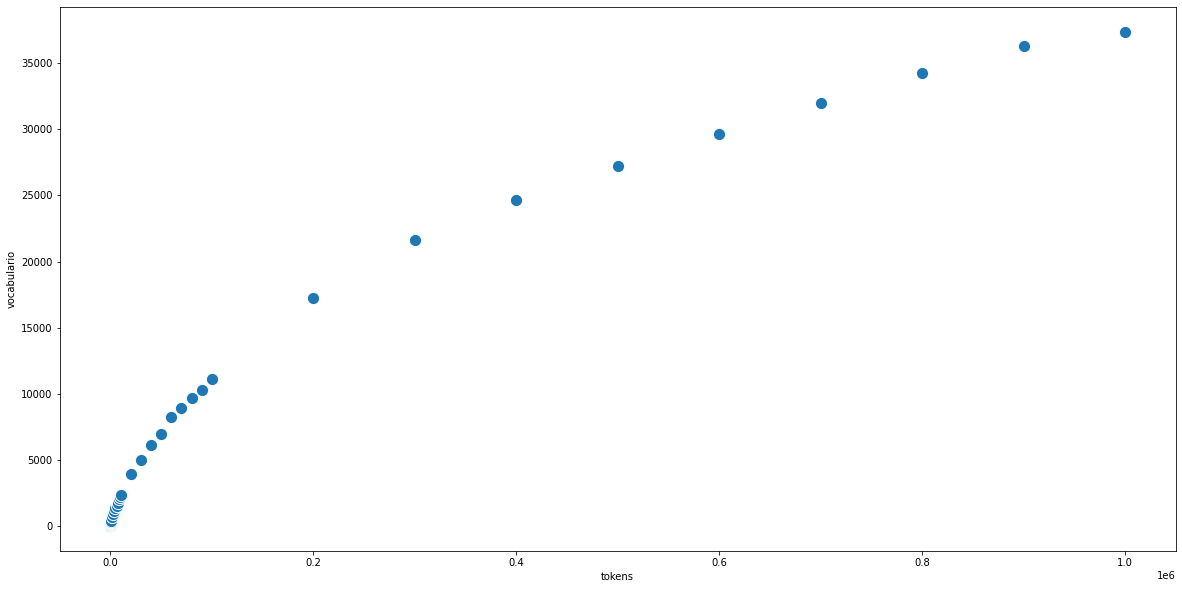

In [132]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data=df, x="tokens", y="vocabulario", ax = ax, s = 150)